In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
# این دستور برای نادیده گرفتن هشدار های عمومی ههست
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)


In [18]:
!kaggle datasets download -d <username>/<dataset-name>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kaggle datasets download -d <username>/<dataset-name>'


In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [20]:
pip install kaggle

In [21]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python


Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
import kagglehub
import pandas as pd
import os

# دانلود آخرین نسخه
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("مسیر فایل‌های مجموعه داده:", path)

# ساخت مسیر فایل با استفاده از os.path.join
file_path = os.path.join(path, "Mall_Customers.csv")

# بررسی وجود فایل
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"خطا: فایل در {file_path} یافت نشد")
    print("لطفا مسیر را بررسی کنید یا مطمئن شوید که مجموعه داده به درستی دانلود شده است.")

مسیر فایل‌های مجموعه داده: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [27]:
import pandas as pd
import os

# مسیر کامل فایل
file_path = '/root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv'

# بررسی وجود فایل
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("فایل با موفقیت خوانده شد.")
    # نمایش 5 ردیف اول داده
    print(df.head())
    # نمایش اطلاعات آماری داده
    print(df.describe())
else:
    print("مسیر فایل نادرست است یا فایل وجود ندارد.")


فایل با موفقیت خوانده شد.
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000 

In [28]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


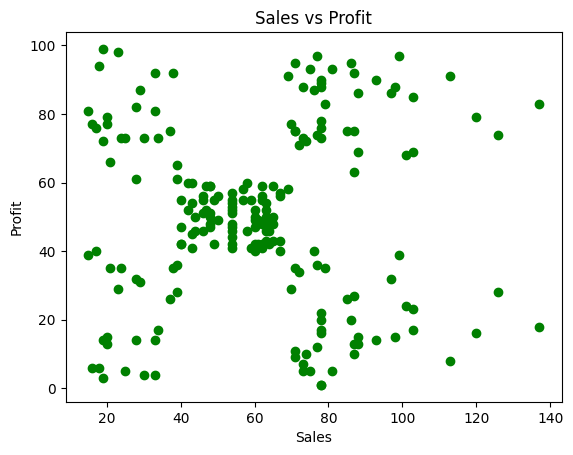

In [29]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='green')
plt.title('Sales vs Profit')
# درآمد سالیانه  بر روی فروش
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

In [30]:
X = df.iloc[:,[3,4]]



: قبل از کاما به معنای انتخاب تمام ردیف‌ها است.
[3,4] بعد از کاما به معنای انتخاب ستون‌های با شاخص ۳ و ۴ است (به یاد داشته باشید که اندیس در پایتون از ۰ شروع می‌شود، بنابراین ستون‌های سوم و



In [31]:
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


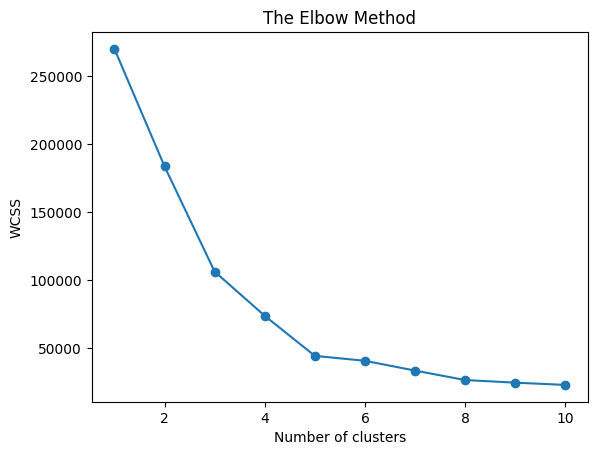

In [32]:
#please ignore the KMean memory leak warning it was nothing to do with the Model
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# n_clusters: تعداد خوشه‌هایی که الگوریتم باید ایجاد کند.

# init='k-means++': روش بهینه برای انتخاب مراکز اولیه خوشه‌ها.

# random_state: تنظیم مقدار ثابت برای دانه مولد اعداد تصادفی جهت تکرارپذیری نتایج.





# n_clusters: The number of clusters that the algorithm should create.

# init='k-means++': The optimal method for selecting initial cluster centers.

# random_state: Setting a fixed seed value for the random number generator to ensure reproducibility of results.

In [33]:
#please ignore the KMean memory leak warning it was nothing to do with the Modelkmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [34]:
print(y_kmeans)

[6 3 4 3 6 3 4 3 4 3 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 8 6 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 0 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 1 2 5 2 5 2 1 2 1 2 5 2 1 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 9 7 9 7 9]


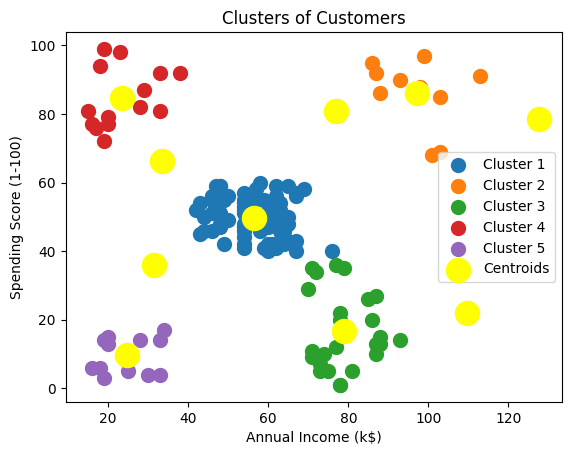

In [35]:
for cluster in range(5):
# X.iloc[y_kmeans == cluster, 0]: Selects all data points in the first column of X where their cluster is equal to cluster.

# X.iloc[y_kmeans == cluster, 1]: Selects all data points in the second column of X where their cluster is equal to cluster.

# s=100: Sets the size of the points in the plot.

# label=f'Cluster {cluster + 1}'



    plt.scatter(
        X.iloc[y_kmeans == cluster, 0],
        X.iloc[y_kmeans == cluster, 1],
        s=100,
        label=f'Cluster {cluster + 1}'
    )

# X.iloc[y_kmeans == cluster, 0]: Selects all data points in the first column of X where their cluster is equal to cluster.

# X.iloc[y_kmeans == cluster, 1]: Selects all data points in the second column of X where their cluster is equal to cluster.

# s=100: Sets the size of the points in the plot.

# label=f'Cluster {cluster + 1}': Sets the label for the clusters using an f-string.


plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='yellow',
    label='Centroids'
)



# kmeans.cluster_centers_[:, 0]: Selects the cluster centroids in the x-axis.

# kmeans.cluster_centers_[:, 1]: Selects the cluster centroids in the y-axis.

# s=300: Sets the size of the points representing the centroids.

# c='yellow': Sets the color of the centroid points to yellow.

# label='Centroids': Labels these points as "Centroids".

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# plt.title('Clusters of Customers'): Sets the title of the plot to "Clusters of Customers".

# plt.xlabel('Annual Income (k$)'): Sets the x-axis label to "Annual Income (k$)".

# plt.ylabel('Spending Score (1-100)'): Sets the y-axis label to "Spending Score (1-100)".

# plt.legend(): Displays the legend for the clusters and centroids.

# plt.show(): Displays the plot.

In [36]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.4426214845978157


Silhouette Score: 0.4426214845978157 What does this score mean?
The Silhouette score calculated for your clustering is 0.4426. This number indicates that the quality of your clustering is relatively good.

More about the Silhouette score:
The Silhouette score ranges from -1 to 1:

A score close to 1: indicates that the clusters are well-separated and that each point belongs to the right cluster.

A score close to 0: indicates that the clusters overlap and that the data points are crowded at the cluster boundaries.

A score close to -1: indicates that the data points are assigned to the wrong clusters.

Interpretation of your score:

0.4426: This number indicates that your clustering is of good quality and that the clusters are significantly separated. However, there may be some room for improvement. Your score is above 0.4, which is considered a good score, but it has not yet reached 1, which indicates perfect clustering.


Good but not perfect!:(